# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Data Set:

In [2]:
df=pd.read_csv('Census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA:

In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

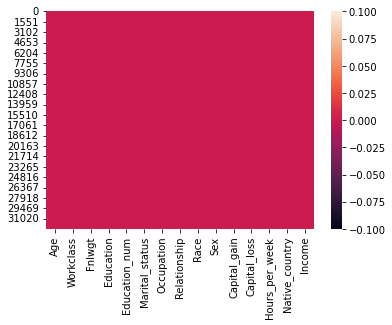

In [8]:
import seaborn as sns  #import seaborn for visualization
sns.heatmap(df.isnull())

So,from the above we can say that our dataset is free from missing values.

In [9]:
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


There are no empty spaces in the dataset.

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
for i in df.columns:
        print(df[i].unique())
        print('___________')

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
___________
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
___________
[ 83311 215646 234721 ...  34066  84661 257302]
___________
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
___________
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
___________
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
___________
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-

In [13]:
for i in df.columns:
        print(df[i].value_counts())
        print('__________________________')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
__________________________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
__________________________
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
__________________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th        

In [14]:
#Let's Replace the '?' with frequently occuring values.
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [15]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [16]:
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [17]:
#we can see that 'capital_loss' & 'capital_gain' has many zero values.
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

# Data Visualisation:

In [18]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


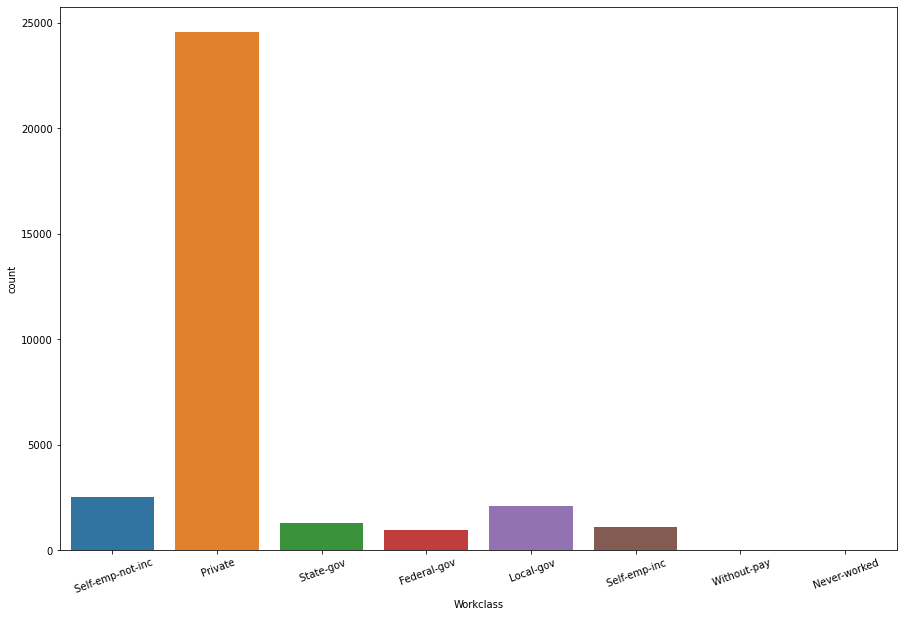

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df["Workclass"])
plt.xticks(rotation=20,fontsize=10)
plt.show()

The Private sector's Value count is Higher than other sectors.

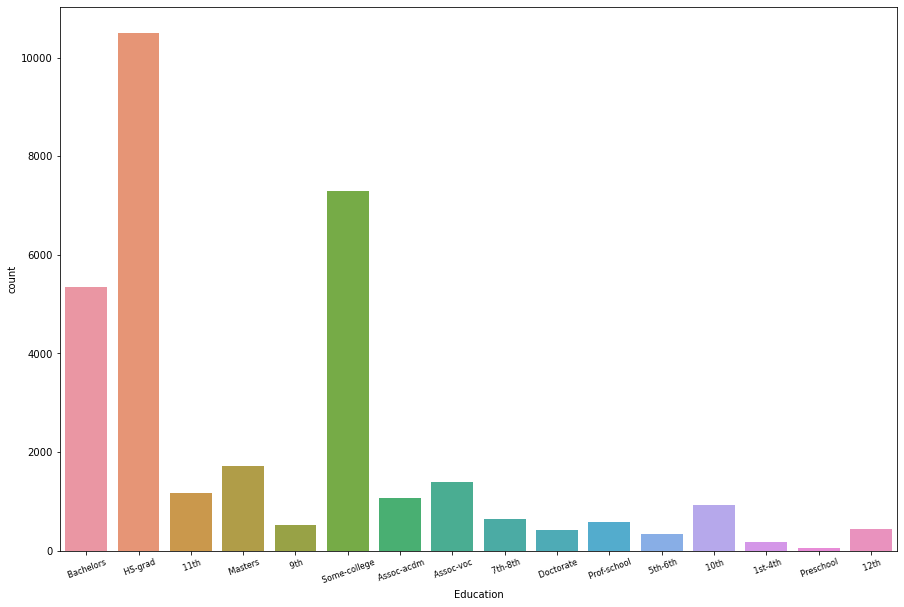

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df["Education"])
plt.xticks(rotation=20,fontsize=8)
plt.show()

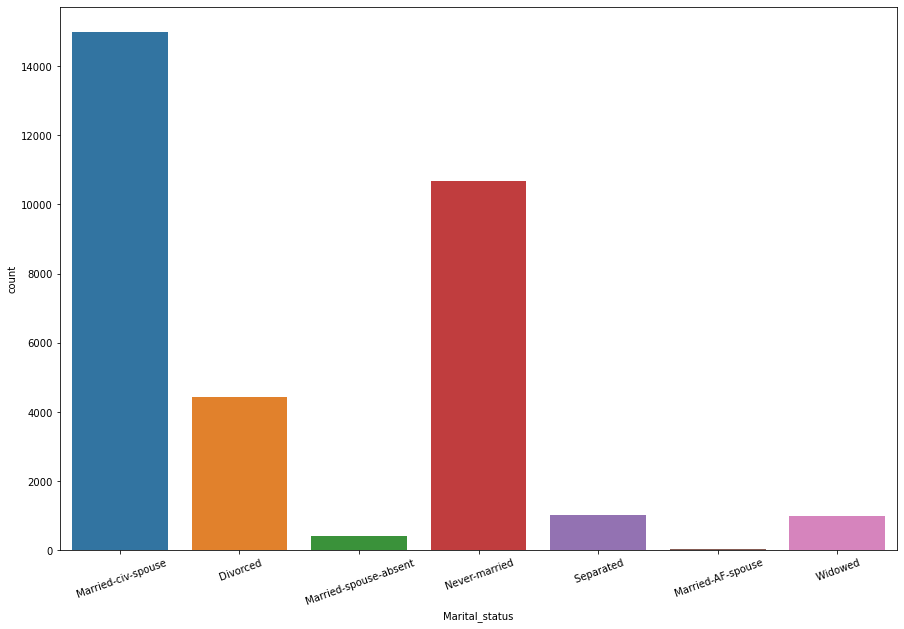

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(df["Marital_status"])
plt.xticks(rotation=20,fontsize=10)
plt.show()

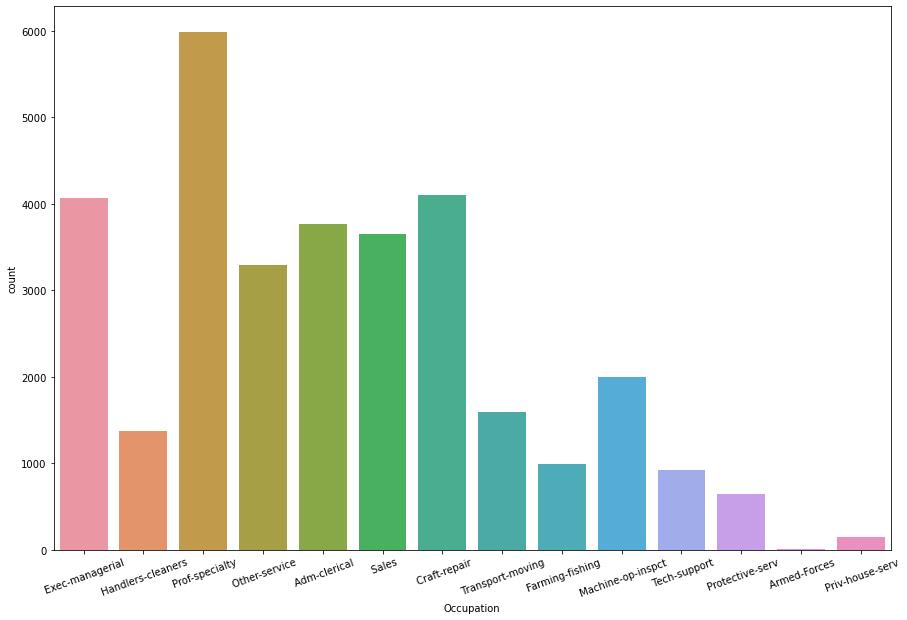

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(df["Occupation"])
plt.xticks(rotation=20,fontsize=10)
plt.show()

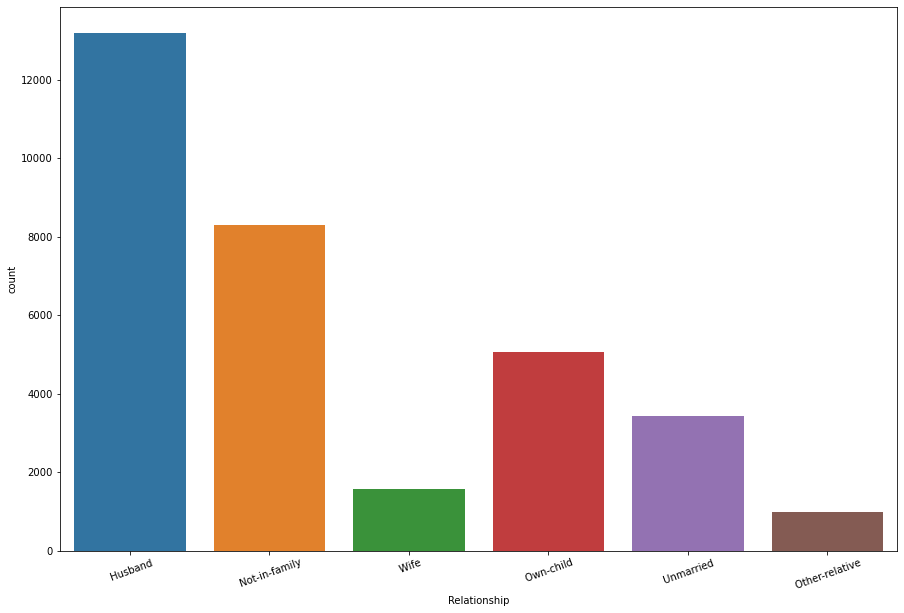

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(df["Relationship"])
plt.xticks(rotation=20,fontsize=10)
plt.show()

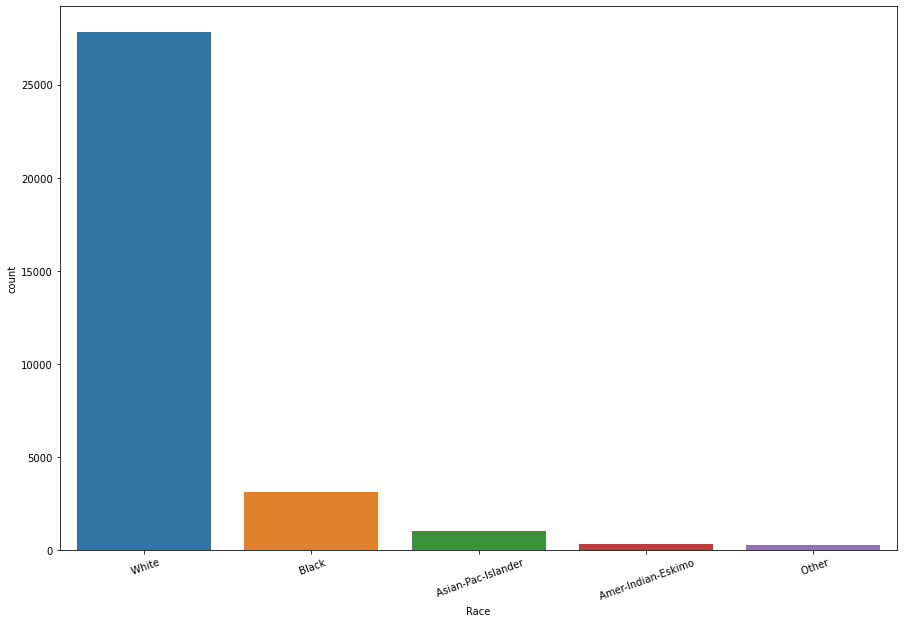

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df["Race"])
plt.xticks(rotation=20,fontsize=10)
plt.show()

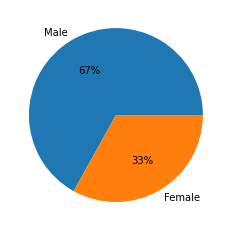

In [25]:
df["Sex"].value_counts()
fig,ax=plt.subplots()
labels='Male','Female'
ax.pie(df['Sex'].value_counts(), labels=labels,autopct='%1.0f%%')
plt.show()

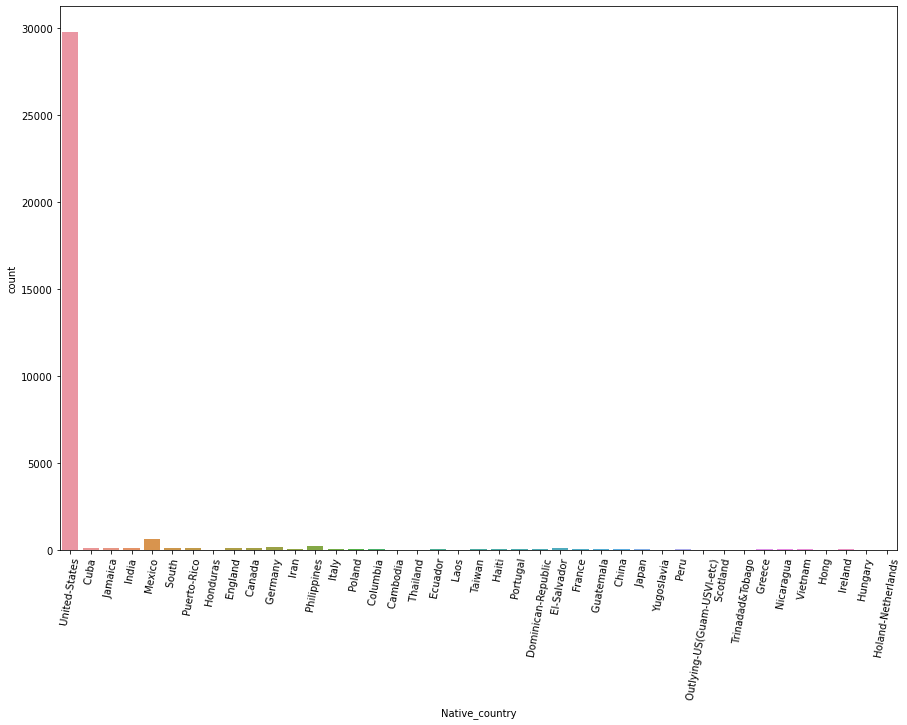

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(df["Native_country"])
plt.xticks(rotation=80,fontsize=10)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

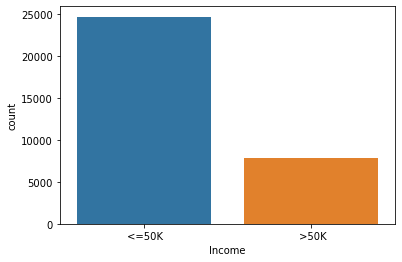

In [27]:
#our target variable
sns.countplot(df['Income'])

In [28]:
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


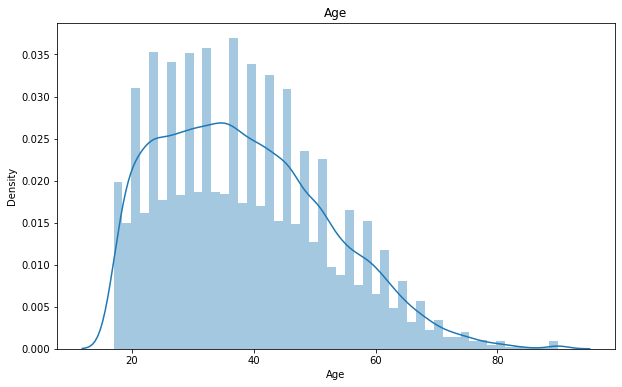

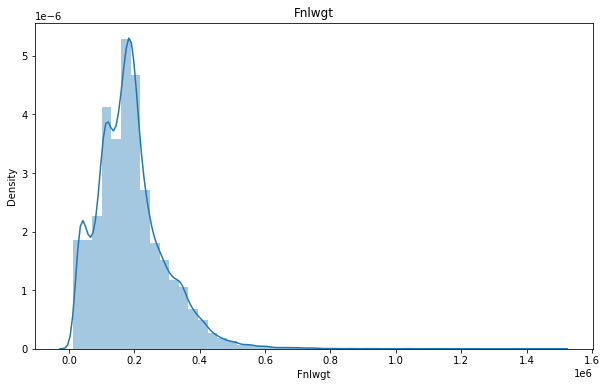

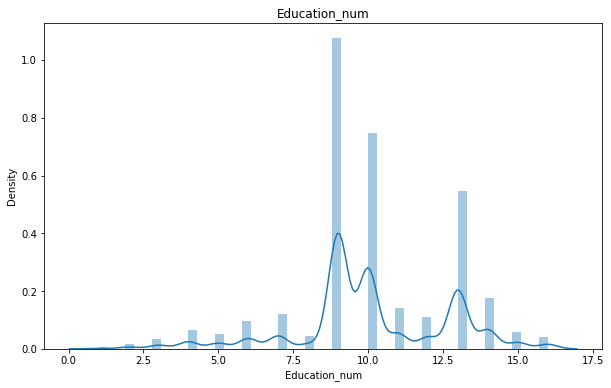

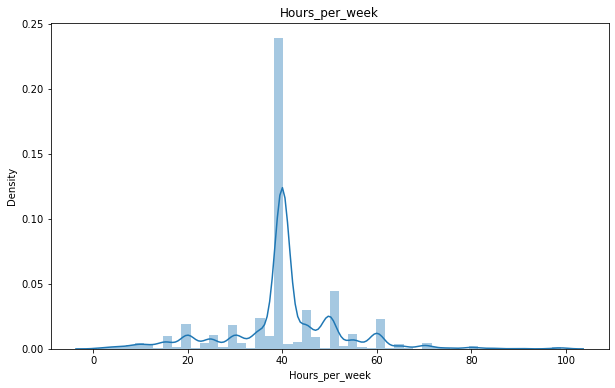

In [29]:
for i in df[num_cols]:              
    plt.figure(figsize = (10,6))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

Bivariate Analysis:

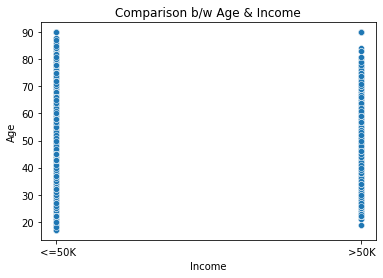

In [30]:
sns.scatterplot(x='Income',y='Age',data=df)
plt.title('Comparison b/w Age & Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

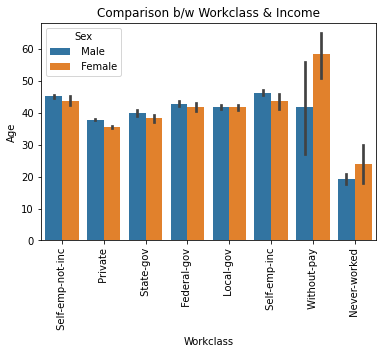

In [31]:
sns.barplot(x='Workclass',y='Age',hue='Sex',data=df)
plt.title('Comparison b/w Workclass & Income')
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

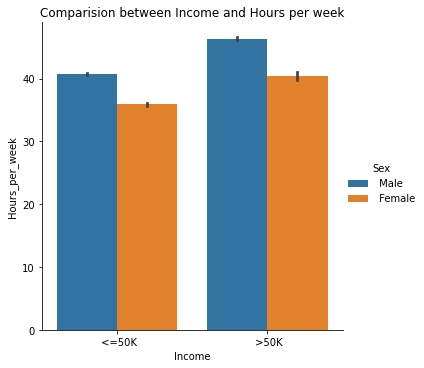

In [32]:
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex");
plt.title('Comparision between Income and Hours per week')
plt.show()

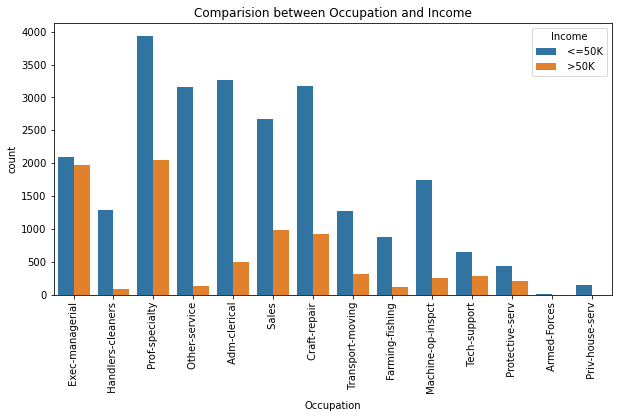

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df["Occupation"],hue=df["Income"])
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

Multivariate Analysis:

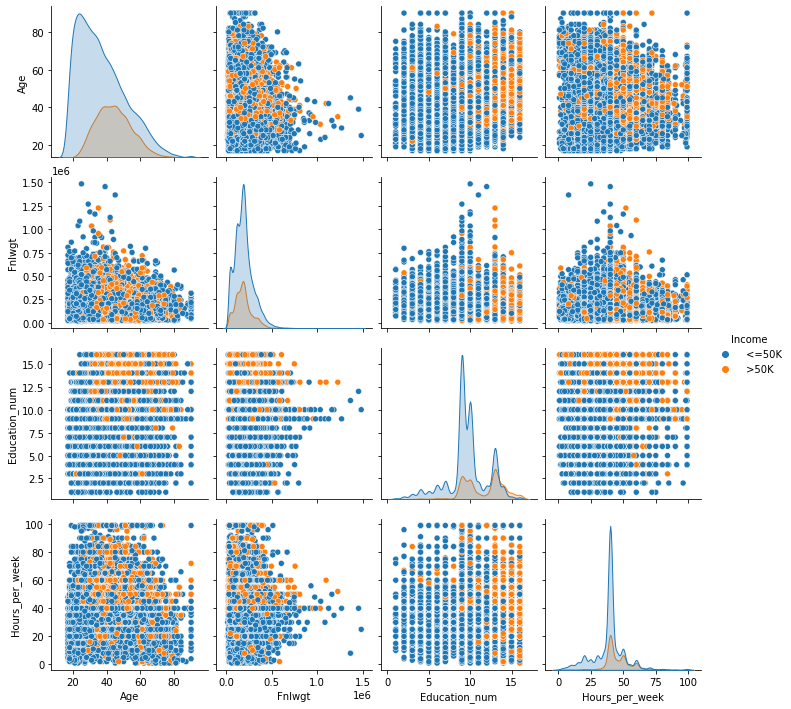

In [34]:
sns.pairplot(df,hue="Income")

# Outliers Check:

<AxesSubplot:>

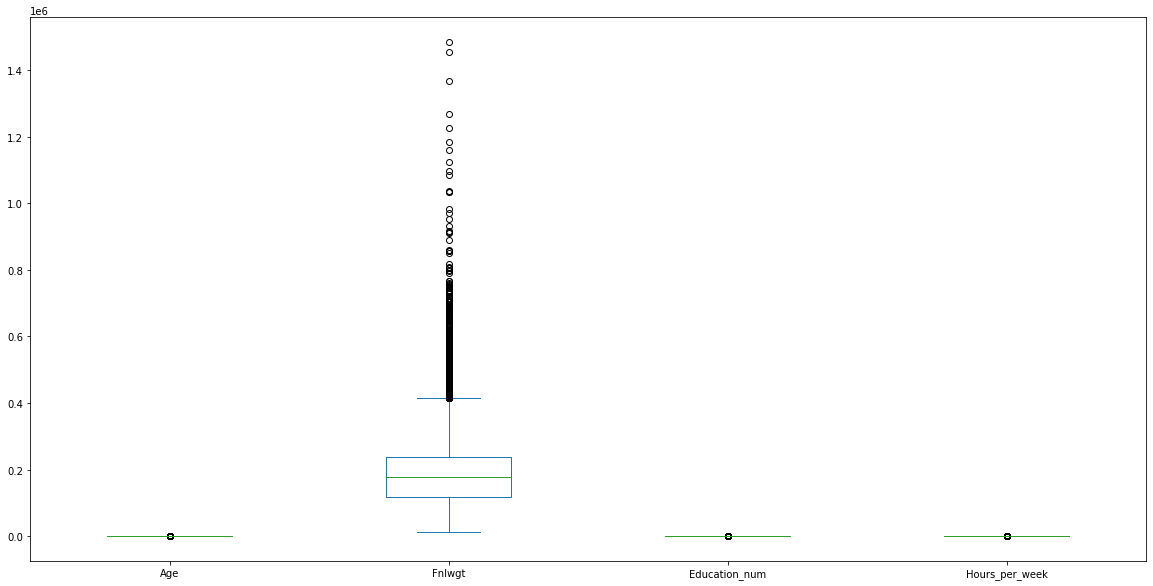

In [35]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

There are outliers in the columns.

# Removing Outliers:

In [36]:
df1=df.drop(cat_cols,axis=1).copy()

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [38]:
df.shape

(32560, 13)

In [39]:
df_new.shape

(31461, 13)

# Percentage of Loss:

In [40]:
loss = (32560-31461)/32560*100
loss

3.3753071253071254

The loss is 3%,which is good for our model.

# Skewness:

In [41]:
df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In [42]:
sk=['Fnlwgt']

In [43]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')
df_new[sk] = Scaler.fit_transform(df_new[sk].values)
df_new[sk].skew()

Fnlwgt   -0.034507
dtype: float64

# Encoding:

In [44]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_cols]=df_new[cat_cols].apply(LE.fit_transform)

In [45]:
df_new[cat_cols]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,3,6,2,12,5,4,0,38,0
32556,3,10,2,6,0,4,1,38,1
32557,3,10,6,0,4,4,0,38,0
32558,3,10,4,0,3,4,1,38,0


# Correlation:

In [46]:
df_new.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.001992,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001992,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


<AxesSubplot:>

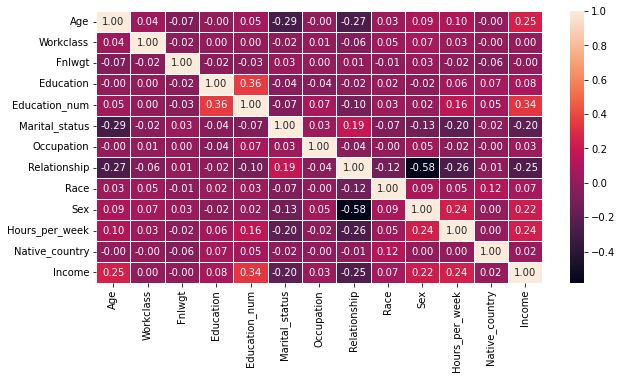

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

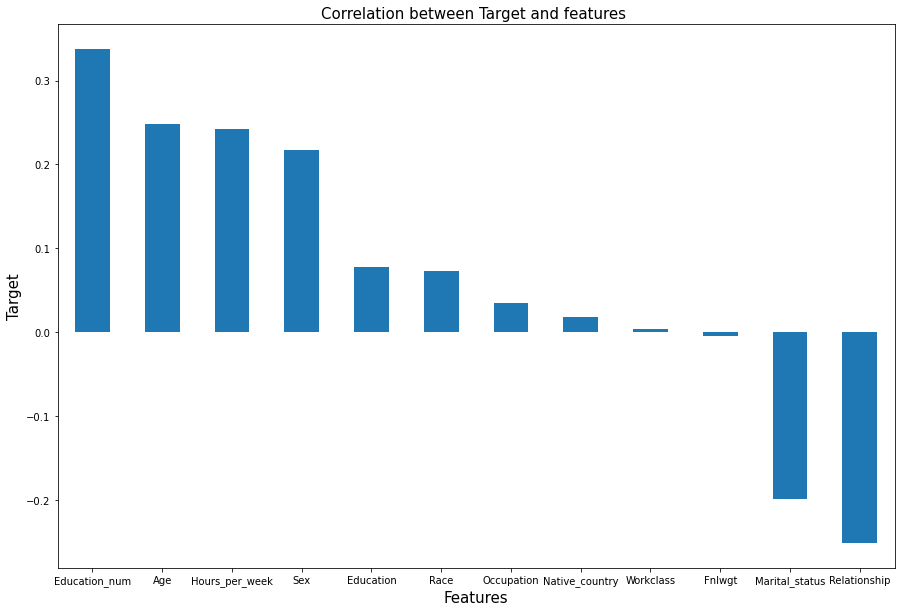

In [48]:
plt.figure(figsize=(15,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=360)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

we can observe that 'workclass' has least correlation with target variable.So,let's drop it.

In [49]:
df_new=df_new.drop(["Workclass"],axis=1)

# Seperating the columns into features and target as X and Y:

In [50]:
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

# Scaling:

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,-1.114171,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.427192,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.607320,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,1.487719,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,1.048962,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.812145,-0.942469,0.750829,-0.403597,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,-0.207385,0.245782,-0.459657,-0.403597,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,-0.235114,0.245782,-0.459657,2.255438,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.288776,0.245782,-0.459657,0.925921,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [52]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

Now,let's Balance the data.

In [53]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [54]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

# Best Random State:

In [55]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [56]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8428002515195976  on Random_state  154


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=141)

# Decision Tree Classifier:

In [58]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.8368266610773423
Confusion Matrix is  
 [[3976  799]
 [ 758 4009]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      4775
           1       0.83      0.84      0.84      4767

    accuracy                           0.84      9542
   macro avg       0.84      0.84      0.84      9542
weighted avg       0.84      0.84      0.84      9542



# Random Forest Classifier:

In [59]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.880842590651855
Confusion_Matrix is  [[4143  632]
 [ 505 4262]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4775
           1       0.87      0.89      0.88      4767

    accuracy                           0.88      9542
   macro avg       0.88      0.88      0.88      9542
weighted avg       0.88      0.88      0.88      9542



# KNeighbors Classifier:

In [60]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8438482498428003
[[3656 1119]
 [ 371 4396]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      4775
           1       0.80      0.92      0.86      4767

    accuracy                           0.84      9542
   macro avg       0.85      0.84      0.84      9542
weighted avg       0.85      0.84      0.84      9542



# Support Vector Classifier:

In [61]:
SVC=SVC()
SVC.fit(x_train,y_train)
pred=SVC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.8196394885768182
Confusion_Matrix is  [[3582 1193]
 [ 528 4239]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      4775
           1       0.78      0.89      0.83      4767

    accuracy                           0.82      9542
   macro avg       0.83      0.82      0.82      9542
weighted avg       0.83      0.82      0.82      9542



# Cross Validation:

In [62]:
from sklearn.model_selection import cross_val_score
for i in range(2,20):
    cr=cross_val_score(DTC,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  81.4740284240976
at cv=  3
cross val score =  81.93099400494698
at cv=  4
cross val score =  82.58724928062789
at cv=  5
cross val score =  83.07987583773686
at cv=  6
cross val score =  83.15306250786064
at cv=  7
cross val score =  83.35447048886618
at cv=  8
cross val score =  83.44689341819827
at cv=  9
cross val score =  83.34405082384282
at cv=  10
cross val score =  83.29177152142553
at cv=  11
cross val score =  83.37534372445826
at cv=  12
cross val score =  83.60427502119636
at cv=  13
cross val score =  83.67113955435877
at cv=  14
cross val score =  83.721647343212
at cv=  15
cross val score =  83.58775736701865
at cv=  16
cross val score =  83.63779906319276
at cv=  17
cross val score =  83.4410332512484
at cv=  18
cross val score =  83.54402792506606
at cv=  19
cross val score =  83.73815810141812


In [63]:
print(cross_val_score(DTC,x,y,cv=14).mean())

0.8374471771928903


In [64]:
print(cross_val_score(rfc,x,y,cv=14).mean())

0.8841072988660857


In [65]:
print(cross_val_score(kn,x,y,cv=14).mean())

0.8488675177963387


# HyperParameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[10,15,20,25],'criterion':['gini','entropy'],'n_estimators':[100,200,300,400]}
GCV=GridSearchCV(rfc,parameters,cv=14,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

# Saving:

In [ ]:
import pickle
filename='census.pkl'
pickle.dump(rfc, open(filename,'wb'))